# 07/10/2020

## Getting started

### Objectives

* discover and know how to write a Python program
* discover and know how to use a notebook
* manipulate variables

### Code cells

* The two cells containing codes should be:

In [1]:
40 + 2

42

In [2]:
year = 2020
course = "FTIP"
print(course + " " + str(year))

FTIP 2020


### Markdown cell

The markdown code
  
```
  Write **bold**, _italic_ or equations: $\sqrt{2}$.
```

produces:

---
  
  Write **bold**, _italic_ or equations: $\sqrt{2}$.
  
---

## Display a saved image

### Objectives

* use functions and modules
* know how to load and display an image, and use a colormap
* display the size of an image
* convert an image to grayscale
* understand that an image is also a 2D signal

### Modules

The use of the function `ccc` available in the submodule `bbb` of the module `aaa` writes `aaa.bbb.ccc`.
I am sure you agree this is a bit long to write, that is why we usually rename the submodule to something shorter.
Thus, the following instructions rename `skimage.io` to` io`, and `matplotlib.pyplot` to` plt`:

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt

The three modules used in this course are:
* [Numpy](http://www.numpy.org/) (scientific programming),
* [Scikit-image](https://scikit-image.org/) (image processing),
* [Matplotlib](https://matplotlib.org/) (display).

Refer to the documentation on these websites to get the syntax of the functions.

### Display the color image

Now you can load the image mandrill.tiff (I load it directly from the website):

In [4]:
f = io.imread("http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03")

and display it (I take this opportunity to add a title):

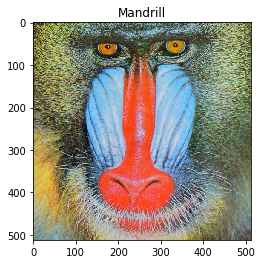

In [5]:
plt.imshow(f)
plt.title('Mandrill');

The image dimensions can be read on the displayed image: a little more than 500 pixels per side, and 3 bands since the image is in color.
A more precise alternative is to use the `shape` function:

In [6]:
print(f.shape)

(512, 512, 3)


So the image if of size 512 × 512, with 3 bands.

### Conversion to grayscale

We need to import a new module (I am doing this at this point, but it is recommended to import all modules at the beginning of the notebook).

Text(0.5, 1.0, 'Mandrill (grayscale)')

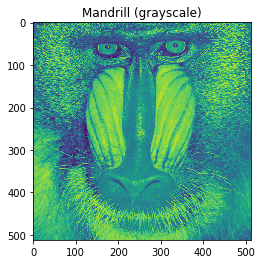

In [7]:
import skimage.color as color

g = color.rgb2gray(f)
plt.imshow(g)
plt.title('Mandrill (grayscale)')

What's that weird grayscale image? It's rather green... 😲

Actually, this does be a grayscale image (the image has only one band).
But the default colormap with `imshow` is a gradient of blue and green.
To display it in real gray levels, you must specify the option `cmap` in` imshow`.
A large number of palettes are available see. [catalog](https://matplotlib.org/examples/color/colormaps_reference.html));
here we choose the classic `gray`:

Text(0.5, 1.0, 'Mandrill (grayscale)')

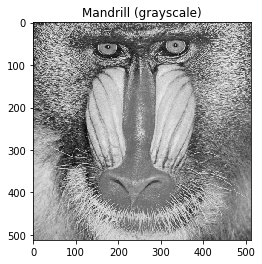

In [8]:
plt.imshow(g, cmap="gray")
plt.title('Mandrill (grayscale)')

Phew! 😅

The grayscale image has intensities in this range:

In [9]:
print("Min : " + str(g.min()))
print("Max : " + str(g.max()))

Min : 0.0
Max : 0.9116803921568628


One can also redefine the range of colors by specifying the intensities corresponding to black (`vmin`) and white (` vmax`):

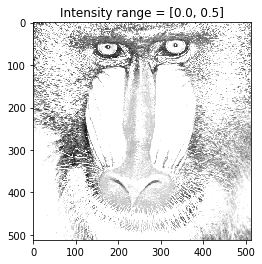

In [10]:
plt.imshow(g, vmin=0.0, vmax=0.5, cmap="gray");
plt.title("Intensity range = [0.0, 0.5]");

### Brightness profile

I choose a horizontal cut on the 200<sup>th</sup> line of the image:

In [11]:
cut = 200          # Cut location
profil = g[cut,:]  # Extract all the pixels of the row 'cut' in the image g

Now we can display the brightness profile...

Text(0.5, 1.0, 'Mandrill')

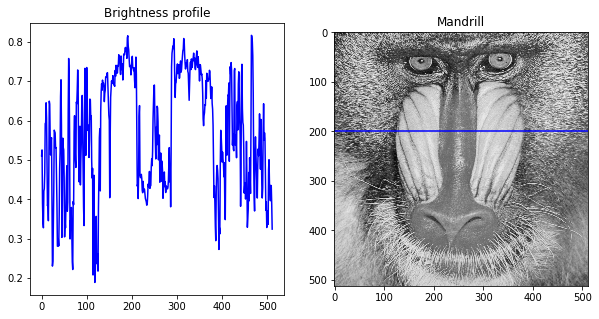

In [12]:
plt.figure(figsize=(10,5))           # New figure with specific display size

plt.subplot(1,2,1)                   # Plot on the left
plt.plot(profil,'b')                 # Brightness profile
plt.title("Brightness profile")      # Title

plt.subplot(1,2,2)                   # Image on the right
plt.imshow(g, cmap="gray")           # Image
plt.plot((0,511), (cut,cut), 'b')    # Cut line in blue
plt.title("Mandrill")                # Title

Do you see on the profile the Mandrill's nose and the protruding ridges on its sides?

## Create a simple image

### Objectives
* synthesize an RGB image (and know, for example, that yellow = green + red)
* manipulate the value / color correspondence
* use the `:` operator

### Image synthesis

As usual, do not forget the modules:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

The image is composed of blocks of homogeneous color with size 20 × 20 pixels, so as to form an image of 40 × 80 pixels.
Also, it contains three bands as it is an RGB image.
Therefore we create an array `f` of size 40 × 80 × 3:

In [14]:
f = np.zeros((40,80,3))

We use [Additive color](https://en.wikipedia.org/wiki/Additive_color) to create the colors.
Thus, yellow is obtained by combining green and red.

In [15]:
f[ 0:20 ,   :   , 0 ] = 1   # Red band (top row:: pixels 0 to 19)
f[  :   ,  0:40 , 1 ] = 1   # Green band (the two columns on the left)
f[  :   , 20:60 , 2 ] = 1   # Blue band (the two columns at the center)

The bands can be displayed separately:

Text(0.5, 1.0, 'Blue band')

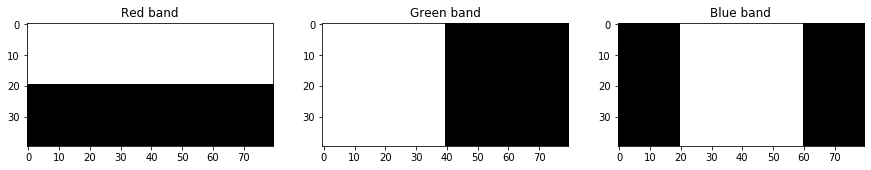

In [16]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.imshow(f[:,:,0], cmap="gray")
plt.title('Red band')

plt.subplot(1,3,2)
plt.imshow(f[:,:,1], cmap="gray")
plt.title('Green band')

plt.subplot(1,3,3)
plt.imshow(f[:,:,2], cmap="gray")
plt.title('Blue band')

And finally the color image:

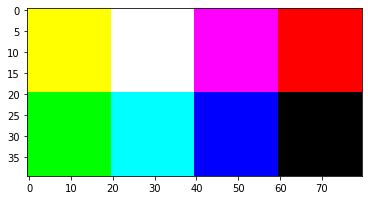

In [17]:
plt.imshow(f)

## Setting the intensity range

### Objectives
* be aware of the need for a good colormap
* know how to adjust the colormap to display the objects of interest

In [18]:
import skimage.io as io
import matplotlib.pyplot as plt

### Display the image

Load and display the image:

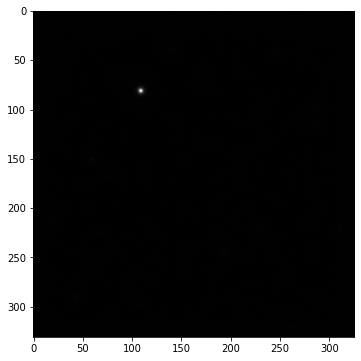

In [19]:
f = io.imread("hdfs.tiff")
plt.figure(figsize=(6,6))
plt.imshow(f, cmap="gray")

This image corresponds to a portion of the sky in the southern hemisphere called the [_Hubble Deep Field South_](http://muse-vlt.eu/science/hdfs-v1-0/). It comes from the [MUSE sensor](http://muse-vlt.eu/science/) installed on the VLT in Chile. It is obtained by averaging around 4000 bands of the original image: we speak of a hyperspectral image. (Source: [Bacon et al., "The MUSE 3D view of the Hubble Deep Field South", _Astronomy & Astrophysics_, 2015](https://www.aanda.org/articles/aa/abs/2015/03/aa25419-14/aa25419-14.html)).

You can see just a small star, however there are many other objects. Because these objects are very distant, they are very faint. In astronomy, as in many other science fields, the pixel intensity is not limited to 256 values. In this case, the intensities lie over the range given below:

In [20]:
print("Mininmal intensity: %d" % f.min())
print("Maximal intensity: %d" % f.max())

Mininmal intensity: 625722
Maximal intensity: 628454834


### Choose a better colormap

Therefore, to observe the other objects, we will adjust the colormap so that the gray levels will lie between `vmin` and `vmax`. 
Intensities less than `vmin` will be displayed in black, and those greater than `vmax` will be in white.
It's up to you to find these values to get an image like the one below, where other stars and galaxies are clearly visible
(and the brightest star is saturated).

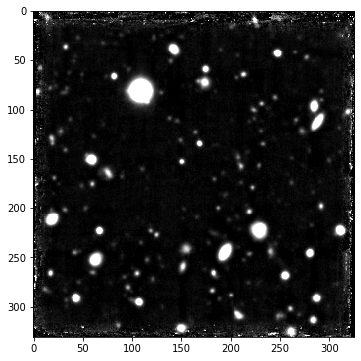

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(f, cmap="gray", vmin=3e6, vmax=4e6)
# NB : ne pas utiliser d'histogramme : ça plante le notebook !

Another possibility is to use colors to increase the dynamics of the intensities observed. The `jet` colormap is used in the example below, with the the same `vmin` and `vmax` as before. We observe a few more objects.

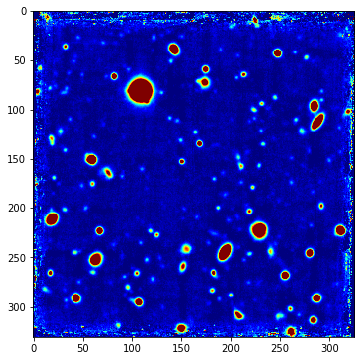

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(f, cmap="jet", vmin=3e6, vmax=4e6)

## Segmentation by histogram thresholding

### Objectives
* display and manipulate a histogram
* define a threshold from a histogram

### Image histogram

In [23]:
import skimage.io as io
import skimage.color as clr
import matplotlib.pyplot as plt
import numpy as np

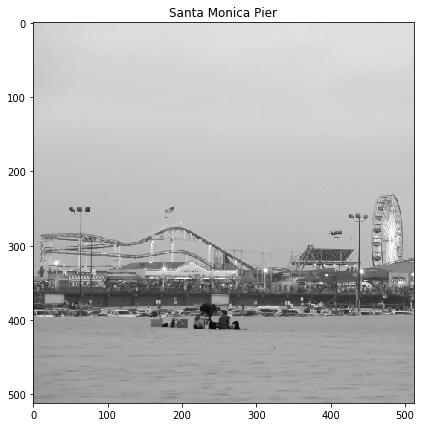

In [24]:
f = io.imread("santamonica.jpg")
f = clr.rgb2gray(f)
plt.figure(figsize=(7,7))
plt.imshow(f, cmap="gray")
plt.title('Santa Monica Pier');

The histogram is obtained with `matplotlib.pyplot.hist`.
As this function calculates the image from a vector, it must be used on the vectorized image, and not the image itself.
The vectorized image is obtained with `numpy.ravel`.
The pixels in a vectorized image are arrange in one dimension.

The histogram of the image is not unique: the number of bins must be specified
Generally, we choose as many bins as gray levels, but this is not mandatory.
The following histograms are obtained with 16, 64 and 256 bins.
Note that the intensities of the image are not between 0 and 255: do you know why (ask the teacher if you cannot get the solution)?

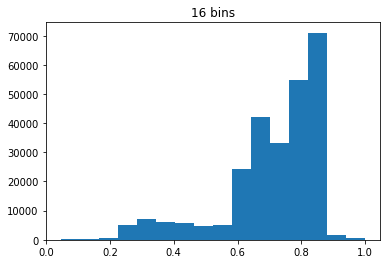

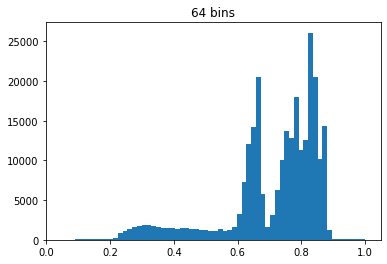

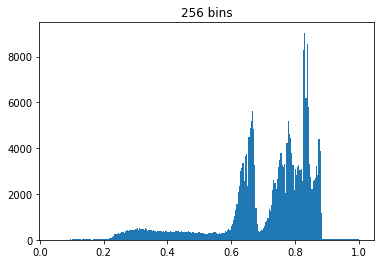

In [25]:
for k in [16, 64, 256]:
    
    plt.figure()
    plt.hist( f.ravel(), bins=k);
    plt.title("%d bins" % k)

One one hand, we easily observe that if the number of bars is low, then the distribution is coarse and some details
(such as the presence of two modes after 0.5) are not visible.
On the other hand, if the bin number is high, then we may have too many details for analysing the result.
In conclusion, the bin number does not necessarily have to be equal to the number of gray levels in the image,
it depends on what we are going to do with the histogram!

### Segmentation in 2 classes

The presence of several modes in the histogram implies several possible thresholds.
The two images below correspond to the thresholds obtained around the three modes of the histogram.

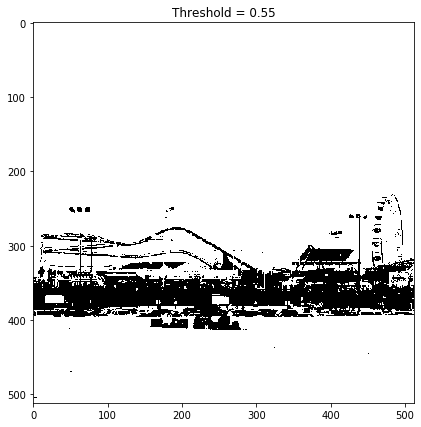

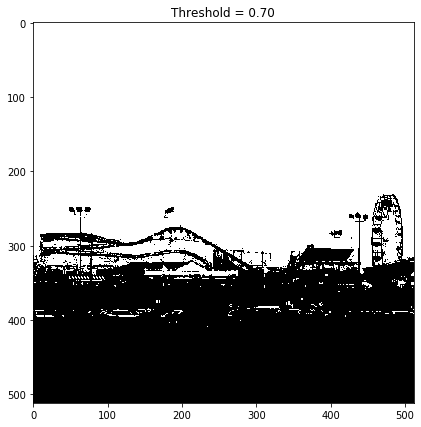

In [26]:
for seuil in [0.55, 0.70]:
    plt.figure(figsize=(7,7))
    plt.imshow(f>seuil, cmap="gray")
    plt.title("Threshold = %.2f" % seuil)

### Segmentation in 3 classes

The histogram is a tool that represents the distribution of the intensities in an image.
We used it in this exercise to define a threshold on the image, then segmenting the image into two classes.
Furthermore, we can define several thresholds to obtain a segmentation with more than two classes, as for example in the image below.

How can you get this result?
Besides, which modes in the histogram correspond to the three identified zones?

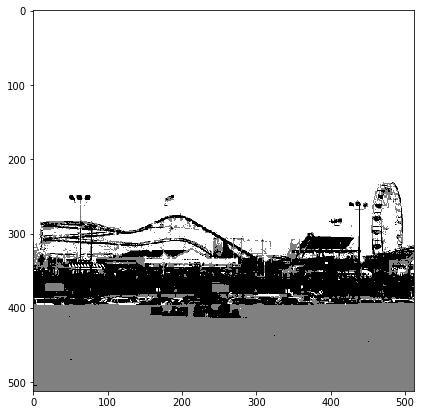

In [27]:
plt.figure(figsize=(7,7))
plt.imshow(1*(f>0.55)+1*(f>0.70), cmap="gray");

There are methods in the literature that are able to determine automatically the value of the threshold(s), such as Otsu's method (see chapter {ref}`C:Segmentation`).

## Contrast enhancement

### Objective
* Apply histogram transformations

In [28]:
import skimage.io as io
import skimage.color as clr
import matplotlib.pyplot as plt
import skimage.exposure as ex
import numpy as np

The image forest.png has been used in several publications dealing with the problem of removing fog from an image (_dehazing_).

* K. He, J. Sun, X. Tang,
  « Single image haze removal using dark channel prior »,
  _IEEE Transactions on Pattern Analysis and Machine Intelligence_, 2011.
* D. Berman, T. Treibitz, S. Avidan,
  « Non-Local Image Dehazing »,
  CVPR 2016, [website](http://www.eng.tau.ac.il/~berman/NonLocalDehazing/).

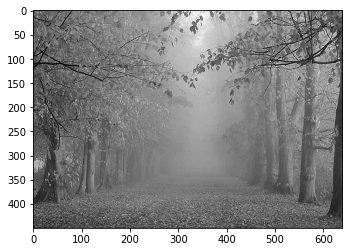

In [29]:
f = io.imread("forest.png")
f = clr.rgb2gray(f)
plt.imshow(f, cmap="gray");

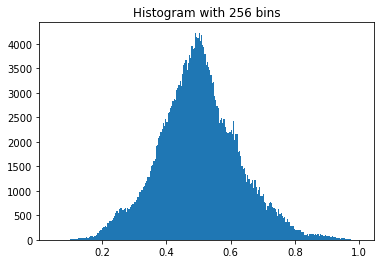

In [30]:
plt.figure()
plt.hist( np.ravel(f), bins=256)
plt.title("Histogram with 256 bins");

The original image and its histogram are given above.
The histogram is mono-modal (it has only one maximum) and uses the full range of intensities quite well.
However, there are few pixels with low or high intensities, explaining the lack of contrast in the image.

Thus, what is the effect on this image of a histogram spread?

### Multiplication by a real

By multiplying the intensities by a coefficient (here: 1.3), the histogram is dilated: low intensities stay weak while high intensities increase.
Therefore the image is lighter, but the dark areas are little changed.
As a result, the contrast is better.
Note that the two images are represented with intensities between 0 (`vmin`) and 1 (` vmax`).

Is this observation still valid for other values of the multiplicative coefficient?

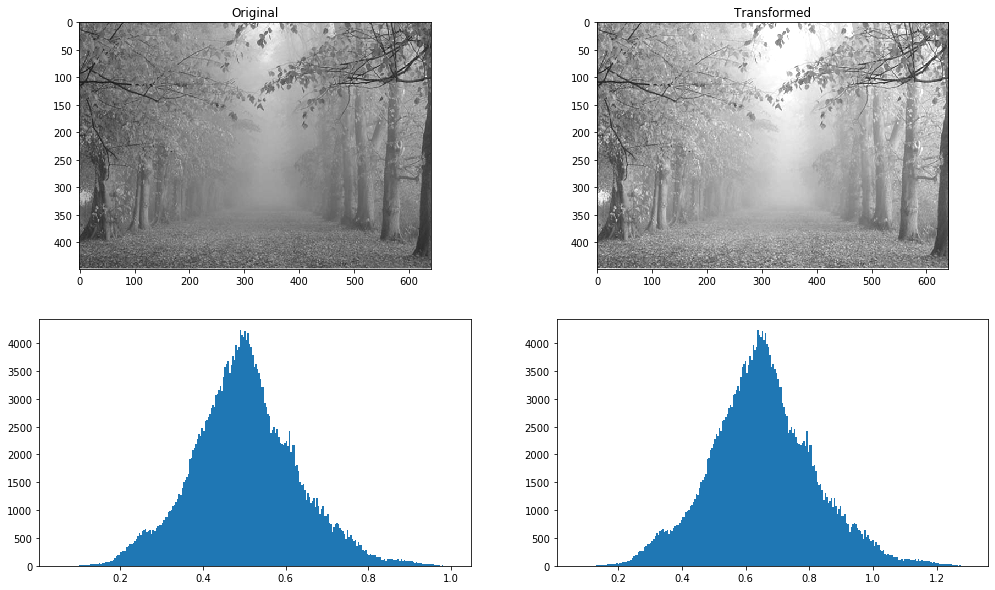

In [31]:
g = 1.3 * f

plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
plt.imshow(f, cmap="gray", vmin=0.0, vmax=1.0)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(g, cmap="gray", vmin=0.0, vmax=1.0)
plt.title('Transformed')

plt.subplot(2,2,3)
plt.hist( np.ravel(f), bins=256);

plt.subplot(2,2,4)
plt.hist( np.ravel(g), bins=256);

### Histogram equalization

The histogram equalization gives the result below.
The image is more contrasted than previously: this is due to the fact that the histogram of the transformed image is (almost) flat.

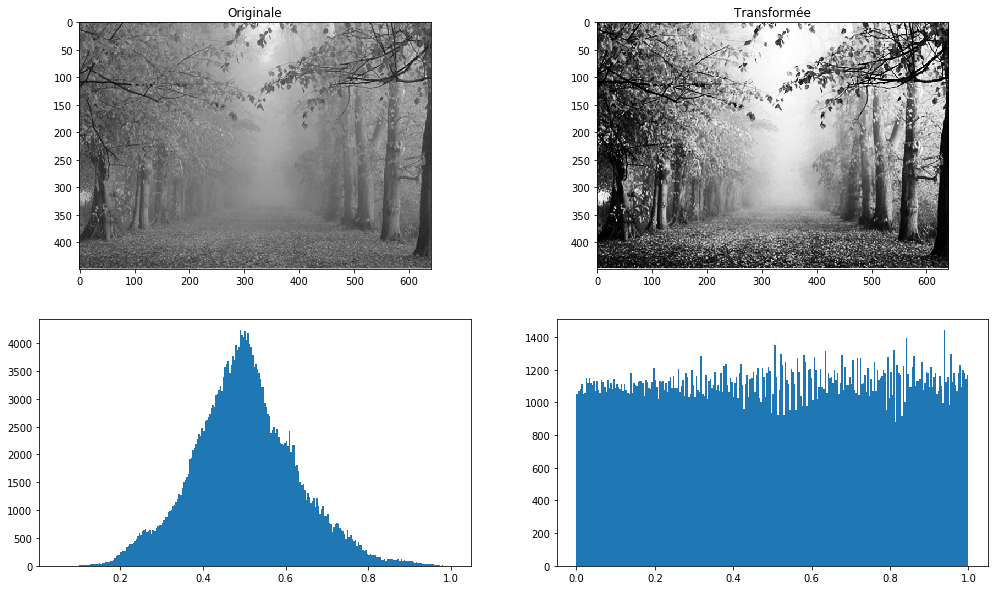

In [32]:
g = ex.equalize_hist(f)

plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
plt.imshow(f, cmap="gray")
plt.title('Originale')

plt.subplot(2,2,2)
plt.imshow(g, cmap="gray")
plt.title('Transformée')

plt.subplot(2,2,3)
plt.hist( np.ravel(f), bins=256);

plt.subplot(2,2,4)
plt.hist( np.ravel(g), bins=256);